# A first look at the Langevin equation

**Author:** [Pierre de Buyl](http://pdebuyl.be/)
**License:** CC-BY

In this notebook, I show a few simple examples of simulating the
Langevin equation with the Euler scheme.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def integrate_langevin_equation(x0, v0, gamma, Nsteps, Nloop, dt, force=None):
    """Use the Euler scheme to simulate the Langevin equation"""
    x = np.array(x0, copy=True)
    v = np.array(v0, copy=True)
    
    x_data = []
    v_data = []
    noise_factor = np.sqrt(2*dt*gamma)
    damp_factor = np.exp(-gamma*dt)
    for i in range(Nsteps):
        for j in range(Nloop):
            v = (1-gamma*dt)*v + noise_factor*np.random.normal(size=v.shape)
            if force is not None:
                v = v + force(x)*dt
            x = x + v * dt
        x_data.append(x)
        v_data.append(v)
        
    return np.array(x_data), np.array(v_data)

## 1D force-free dynamics

In [14]:
# The Langevin equation with no external force

x, v = integrate_langevin_equation(0, 0, 0.1, 10000, 20, 0.002)

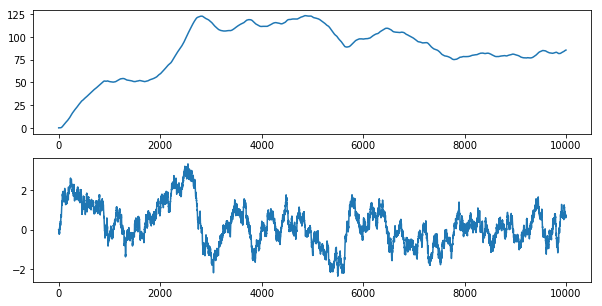

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(x)
plt.subplot(212)
plt.plot(v)

In [16]:
# many realizations:

all_x, all_v = zip(*[integrate_langevin_equation(0, 0, 0.1, 40000, 20, 0.002) for i in range(16)])


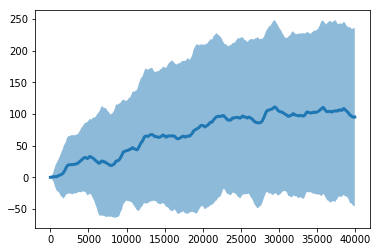

In [17]:
x_mean = np.mean(all_x, axis=0)
x_std = np.std(all_x, axis=0)

plt.fill_between(np.arange(len(x_mean)), x_mean-x_std, x_mean+x_std, alpha=0.5)
plt.plot(x_mean, lw=3)


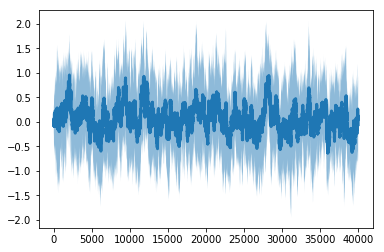

In [18]:
v_mean = np.mean(all_v, axis=0)
v_std = np.std(all_v, axis=0)

plt.fill_between(np.arange(len(v_mean)), v_mean-v_std, v_mean+v_std, alpha=0.5)
plt.plot(v_mean, lw=3)


## 2D example with spring

In [19]:
x, v = integrate_langevin_equation([0., 0.], [0, 0], 2, 10000, 20, 0.002, force=lambda x: -x)

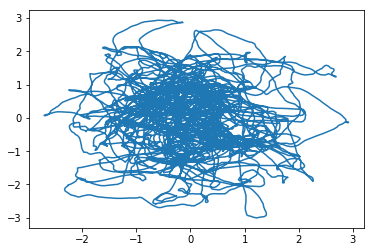

In [20]:
plt.plot(x[:,0], x[:,1])